In [4]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
 95% 61.0M/64.4M [00:04<00:00, 16.3MB/s]
100% 64.4M/64.4M [00:04<00:00, 15.4MB/s]


In [5]:
!unzip /content/cats-and-dogs-image-classification.zip

Archive:  /content/cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1/255,
        fill_mode='nearest')

In [51]:
train_generator = datagen.flow_from_directory(
        '/content/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')

Found 557 images belonging to 2 classes.


In [7]:
first_batch= next(train_generator)

In [8]:
first_batch[0].shape

(32, 150, 150, 3)

In [9]:
first_batch[1][20]

0.0

In [10]:
first_batch[0][0].min()

0.0

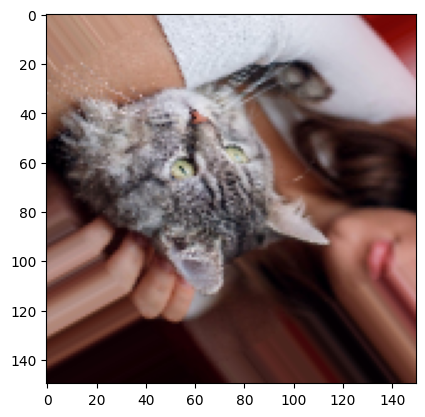

In [11]:
import matplotlib.pyplot as plt

plt.imshow(first_batch[0][20]);

In [12]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [52]:
test_generator = test_datagen.flow_from_directory(
        '/content/test',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')

Found 140 images belonging to 2 classes.


In [62]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
model= Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [18]:
history= model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
18/18 [==============================] - 18s 518ms/step - loss: 0.8329 - accuracy: 0.5081 - val_loss: 0.6949 - val_accuracy: 0.4786
Epoch 2/10
18/18 [==============================] - 6s 329ms/step - loss: 0.6980 - accuracy: 0.5206 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 7s 385ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 7s 370ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 6s 350ms/step - loss: 0.6928 - accuracy: 0.5009 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 9s 526ms/step - loss: 0.6933 - accuracy: 0.4686 - val_loss: 0.6920 - val_accuracy: 0.5286
Epoch 7/10
18/18 [==============================] - 7s 377ms/step - loss: 0.6931 - accuracy: 0.5404 - val_loss: 0.6902 - val_accuracy: 0.5286
Epoch

In [19]:
training_acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
training_loss= history.history['loss']
val_loss= history.history['val_loss']

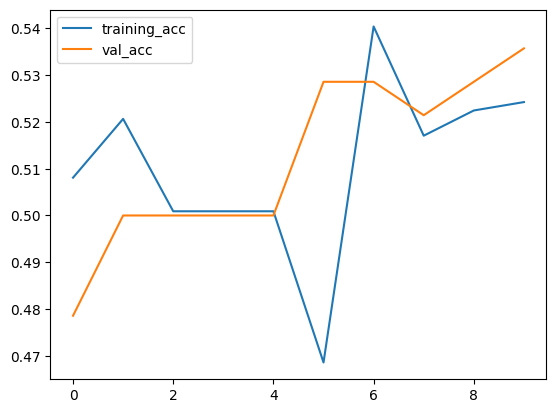

In [20]:
plt.plot(training_acc, label='training_acc')
plt.plot(val_acc, label='val_acc')
plt.legend()

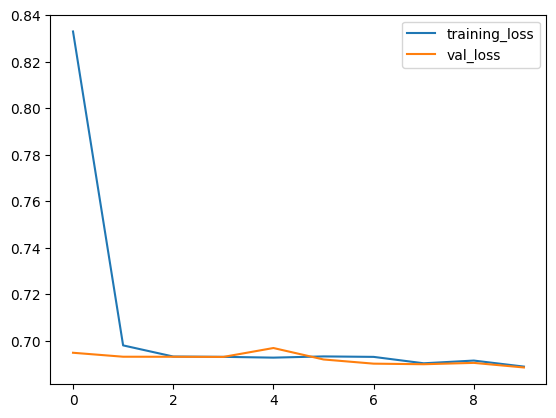

In [21]:
plt.plot(training_loss, label='training_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

In [69]:
from tensorflow.keras.applications.vgg16 import VGG16

In [74]:
transfer_model = VGG16(include_top = False, weights = 'imagenet',input_shape = (150,150,3))
for layer in transfer_model.layers:
    layer.trainable = False

# Defining the output layers
flat = Flatten()(transfer_model.layers[-1].output)
class1 = Dense(units = 256, activation='relu')(flat)
class2 = Dense(units = 256, activation = 'relu')(class1)
output = Dense(units = 1, activation='sigmoid')(class2)
# define new model
transfer_model = Model(inputs=transfer_model.inputs, outputs=output)
transfer_model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [76]:
transfer_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
18/18 [==============================] - 19s 756ms/step - loss: 0.8528 - accuracy: 0.5673 - val_loss: 0.5776 - val_accuracy: 0.6857
Epoch 2/10
18/18 [==============================] - 7s 409ms/step - loss: 0.5402 - accuracy: 0.7163 - val_loss: 0.5325 - val_accuracy: 0.7500
Epoch 3/10
18/18 [==============================] - 6s 350ms/step - loss: 0.5176 - accuracy: 0.7469 - val_loss: 0.5505 - val_accuracy: 0.7286
Epoch 4/10
18/18 [==============================] - 7s 409ms/step - loss: 0.5168 - accuracy: 0.7540 - val_loss: 0.6430 - val_accuracy: 0.7143
Epoch 5/10
18/18 [==============================] - 8s 488ms/step - loss: 0.4929 - accuracy: 0.7558 - val_loss: 0.5355 - val_accuracy: 0.7357
Epoch 6/10
18/18 [==============================] - 6s 360ms/step - loss: 0.4287 - accuracy: 0.8025 - val_loss: 0.4692 - val_accuracy: 0.8071
Epoch 7/10
18/18 [==============================] - 8s 424ms/step - loss: 0.4140 - accuracy: 0.7953 - val_loss: 0.5006 - val_accuracy: 0.7500
Epoch